In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


iris = datasets.load_iris()
X = iris.data[:,[0,2]] #2列目:petal length（花びらの長さ）、3列目:petal width（花びらの幅）
y = iris.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

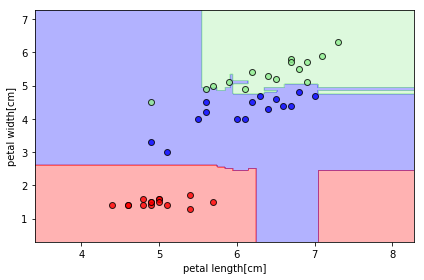

In [5]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

plot_decision_regions(X_test, y_test, classifier=forest, test_idx=None)

plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')

plt.tight_layout()
plt.show()

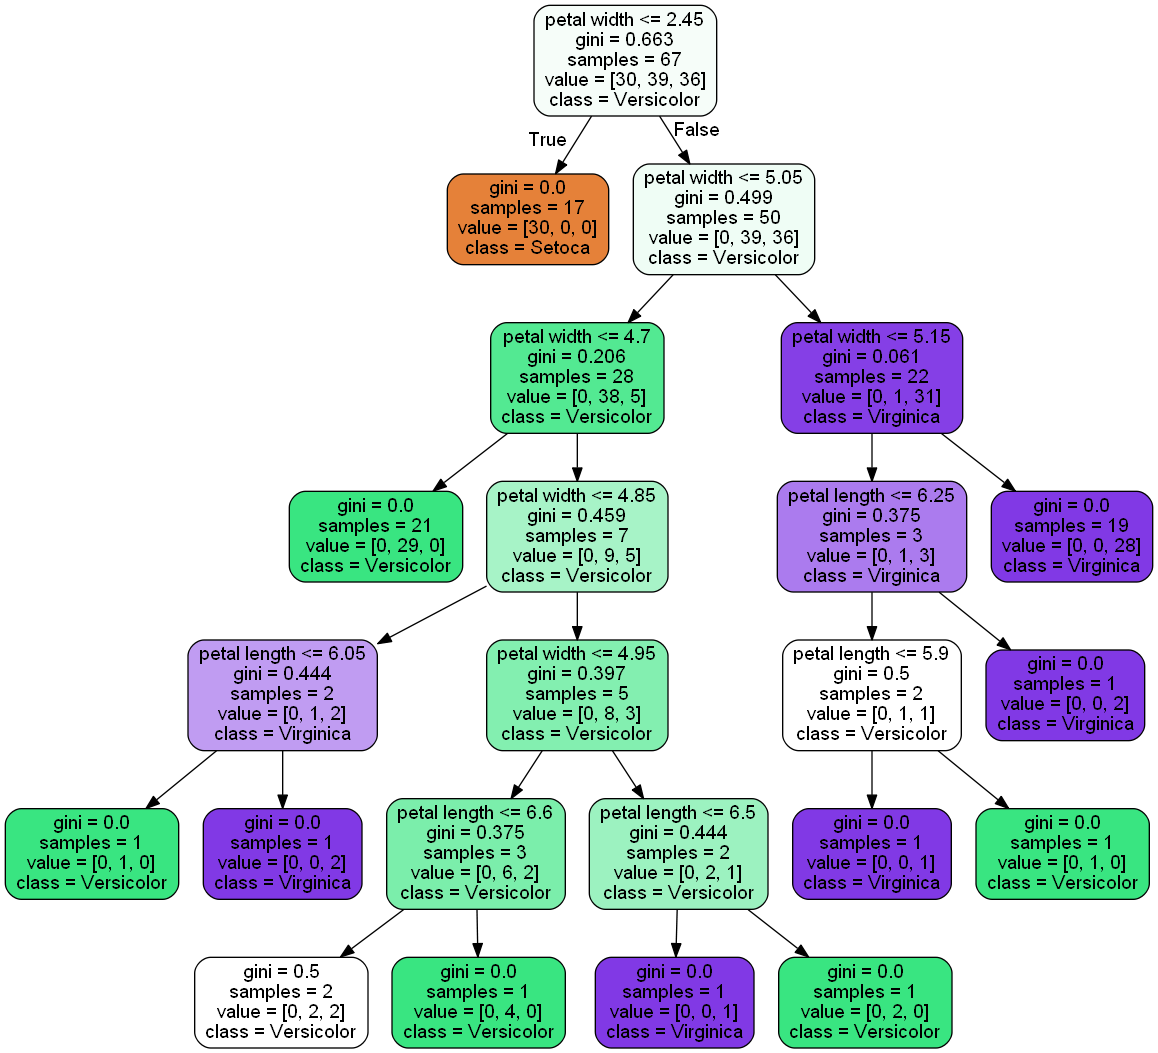

In [8]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

#ランダムフォレストの1つを表示（※アンサンブルモデルのため最終解ツリーは存在しない）
dot_data = export_graphviz(forest.estimators_[2], filled=True, rounded=True,
                           class_names=['Setoca', 'Versicolor', 'Virginica'],
                           feature_names=['petal length','petal width'],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())